#PRACTICAL QUESTIONS

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [2]:
#1.Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy*

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Loading the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Splitting into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Training the model
clf.fit(X_train, y_train)

# Making predictions on test data
y_pred = clf.predict(X_test)

# Calculating and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 100.00%


In [3]:
#2.Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the
#feature importances

# Loading the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Initializing Decision Tree Classifier with Gini criterion
clf = DecisionTreeClassifier(criterion='gini', random_state=42)

# Training the classifier
clf.fit(X, y)

# Printing feature importances
importances = clf.feature_importances_
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")


sepal length (cm): 0.0133
sepal width (cm): 0.0000
petal length (cm): 0.5641
petal width (cm): 0.4226


In [4]:
#3.Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the
#model accuracy*

from sklearn.metrics import accuracy_score

# Splitting into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Decision Tree Classifier with Entropy criterion
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Training the classifier
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Calculating and print model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy (Entropy): {accuracy * 100:.2f}%")



Model Accuracy (Entropy): 100.00%


In [5]:
#4. * Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean
#Squared Error (MSE)*

from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Loading the California housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Training the regressor
regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluating using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


Mean Squared Error: 0.4952


In [6]:
#5. Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz*
!pip install graphviz pydotplus

In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Loading the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Training a Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X, y)

# Exporting the tree structure to Graphviz format
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    special_characters=True
)

# Visualize the tree
graph = graphviz.Source(dot_data)
graph.render("iris_tree", format="png", cleanup=False)  # Saves as iris_tree.png
graph.view()  # Opens the image file in the default viewer


'iris_tree.pdf'

In [8]:
#6. Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its
#accuracy with a fully grown tree*

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Decision Tree with max depth of 3
clf_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_limited.fit(X_train, y_train)
y_pred_limited = clf_limited.predict(X_test)
accuracy_limited = accuracy_score(y_test, y_pred_limited)

# Training a fully grown Decision Tree
clf_full = DecisionTreeClassifier(random_state=42)  # No max_depth set
clf_full.fit(X_train, y_train)
y_pred_full = clf_full.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)

# Printing the accuracy comparison
print(f"Accuracy with max_depth=3: {accuracy_limited * 100:.2f}%")
print(f"Accuracy with full tree   : {accuracy_full * 100:.2f}%")


Accuracy with max_depth=3: 100.00%
Accuracy with full tree   : 100.00%


In [9]:
#7. Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its
#accuracy with a default tree*

# Decision Tree with min_samples_split = 5
clf_custom = DecisionTreeClassifier(min_samples_split=5, random_state=42)
clf_custom.fit(X_train, y_train)
y_pred_custom = clf_custom.predict(X_test)
accuracy_custom = accuracy_score(y_test, y_pred_custom)

# Default Decision Tree
clf_default = DecisionTreeClassifier(random_state=42)
clf_default.fit(X_train, y_train)
y_pred_default = clf_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)

# Compare accuracies
print(f"Accuracy with min_samples_split=5:" ,{accuracy_custom} )
print(f"Accuracy with default settings    : {accuracy_default * 100:.2f}%")


Accuracy with min_samples_split=5: {1.0}
Accuracy with default settings    : 100.00%


In [10]:
#8. Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its
#accuracy with unscaled data*

from sklearn.preprocessing import StandardScaler
# Loading the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model 1: Without feature scaling ---
clf_unscaled = DecisionTreeClassifier(random_state=42)
clf_unscaled.fit(X_train, y_train)
y_pred_unscaled = clf_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

# --- Model 2: With feature scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf_scaled = DecisionTreeClassifier(random_state=42)
clf_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = clf_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Printing the accuracy comparison
print(f"Accuracy without scaling: {accuracy_unscaled * 100:.2f}%")
print(f"Accuracy with scaling   : {accuracy_scaled * 100:.2f}%")


Accuracy without scaling: 100.00%
Accuracy with scaling   : 100.00%


In [11]:
#9. Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass
#classification*

from sklearn.multiclass import OneVsRestClassifier

# Splitting into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Wrapping with OneVsRest strategy
ovr_clf = OneVsRestClassifier(dt)

# Training the OvR classifier
ovr_clf.fit(X_train, y_train)

# Predict on test set
y_pred = ovr_clf.predict(X_test)

# Calculating and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"One-vs-Rest Decision Tree Accuracy: {accuracy * 100:.2f}%")


One-vs-Rest Decision Tree Accuracy: 100.00%


In [12]:
#10. Write a Python program to train a Decision Tree Classifier and display the feature importance scores*


# Training Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Getting feature importances
importances = clf.feature_importances_

# Displaying feature importance scores
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.4f}")


sepal length (cm): 0.0133
sepal width (cm): 0.0000
petal length (cm): 0.5641
petal width (cm): 0.4226


In [13]:
#11. Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance
#with an unrestricted tree

from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Loading California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Decision Tree Regressor with max_depth=5
regressor_limited = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor_limited.fit(X_train, y_train)
y_pred_limited = regressor_limited.predict(X_test)
mse_limited = mean_squared_error(y_test, y_pred_limited)

# Training unrestricted Decision Tree Regressor
regressor_full = DecisionTreeRegressor(random_state=42)
regressor_full.fit(X_train, y_train)
y_pred_full = regressor_full.predict(X_test)
mse_full = mean_squared_error(y_test, y_pred_full)

# Printing comparison of MSE
print(f"MSE with max_depth=5  : {mse_limited:.4f}")
print(f"MSE unrestricted tree : {mse_full:.4f}")


MSE with max_depth=5  : 0.5245
MSE unrestricted tree : 0.4952


In [15]:
#13 * Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision,
#Recall, and F1-Score*

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Loading the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Calculating Precision, Recall, and F1-Score (macro average for multiclass)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Printing metrics
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# Alternatively, detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))



Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



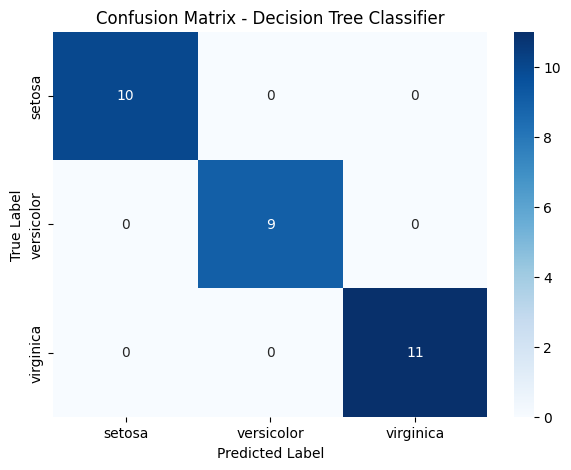

In [16]:
#14. 'Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn*

from sklearn.metrics import confusion_matrix

# Loading the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions on test data
y_pred = clf.predict(X_test)

# Computibg confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualising confusion matrix using seaborn heatmap
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

In [17]:
#15. Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values
#for max_depth and min_samples_split.


from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Best parameters and estimator
best_params = grid_search.best_params_
best_clf = grid_search.best_estimator_

# Predict on test set using the best estimator
y_pred = best_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Best parameters found: {best_params}")
print(f"Test set accuracy with best parameters: {accuracy * 100:.2f}%")

Best parameters found: {'max_depth': 4, 'min_samples_split': 2}
Test set accuracy with best parameters: 100.00%
